# "Am I at Risk of a Stroke? A Data Dive into Stroke Risk"

##  Overview

Strokes are a major health issue and one of the leading causes of death globally. A stroke happens when blood flow to a part of the brain is interrupted, causing brain cells to die. This can result from blockages (ischemic stroke) or bleeding (hemorrhagic stroke). Several factors can increase the risk of having a stroke, such as age, high blood pressure, heart disease, and certain lifestyle choices. By analyzing these factors, I aim to better understand their connection to stroke. This project is based on existing studies that look at how data can improve stroke prediction. My goal is to build on this research by identifying the most influential factors in the dataset and seeing if I can use them to predict stroke risk.

## Analysis

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_score, f1_score, classification_report, roc_curve, confusion_matrix

import statsmodels.api as sm

from imblearn.over_sampling import SMOTE

In [77]:
df = pd.read_csv("strokedata.csv")
df.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [79]:
# Drop the id column
df = df.drop('id',axis=1)
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [80]:
# Check for missing values
df.isnull().sum()

# Replace the missing values with the mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())


In [81]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [82]:
df['gender'].value_counts()

gender
Female    2995
Male      2115
Name: count, dtype: int64

In [83]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [84]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [85]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [86]:
df.corr(numeric_only=True)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


###### Stroke has the highest correlation with age (0.25), indicating older individuals are slightly more likely to experience strokes. Hypertension, heart disease, and glucose levels also show weak positive correlations with stroke
---

## Data Visualization

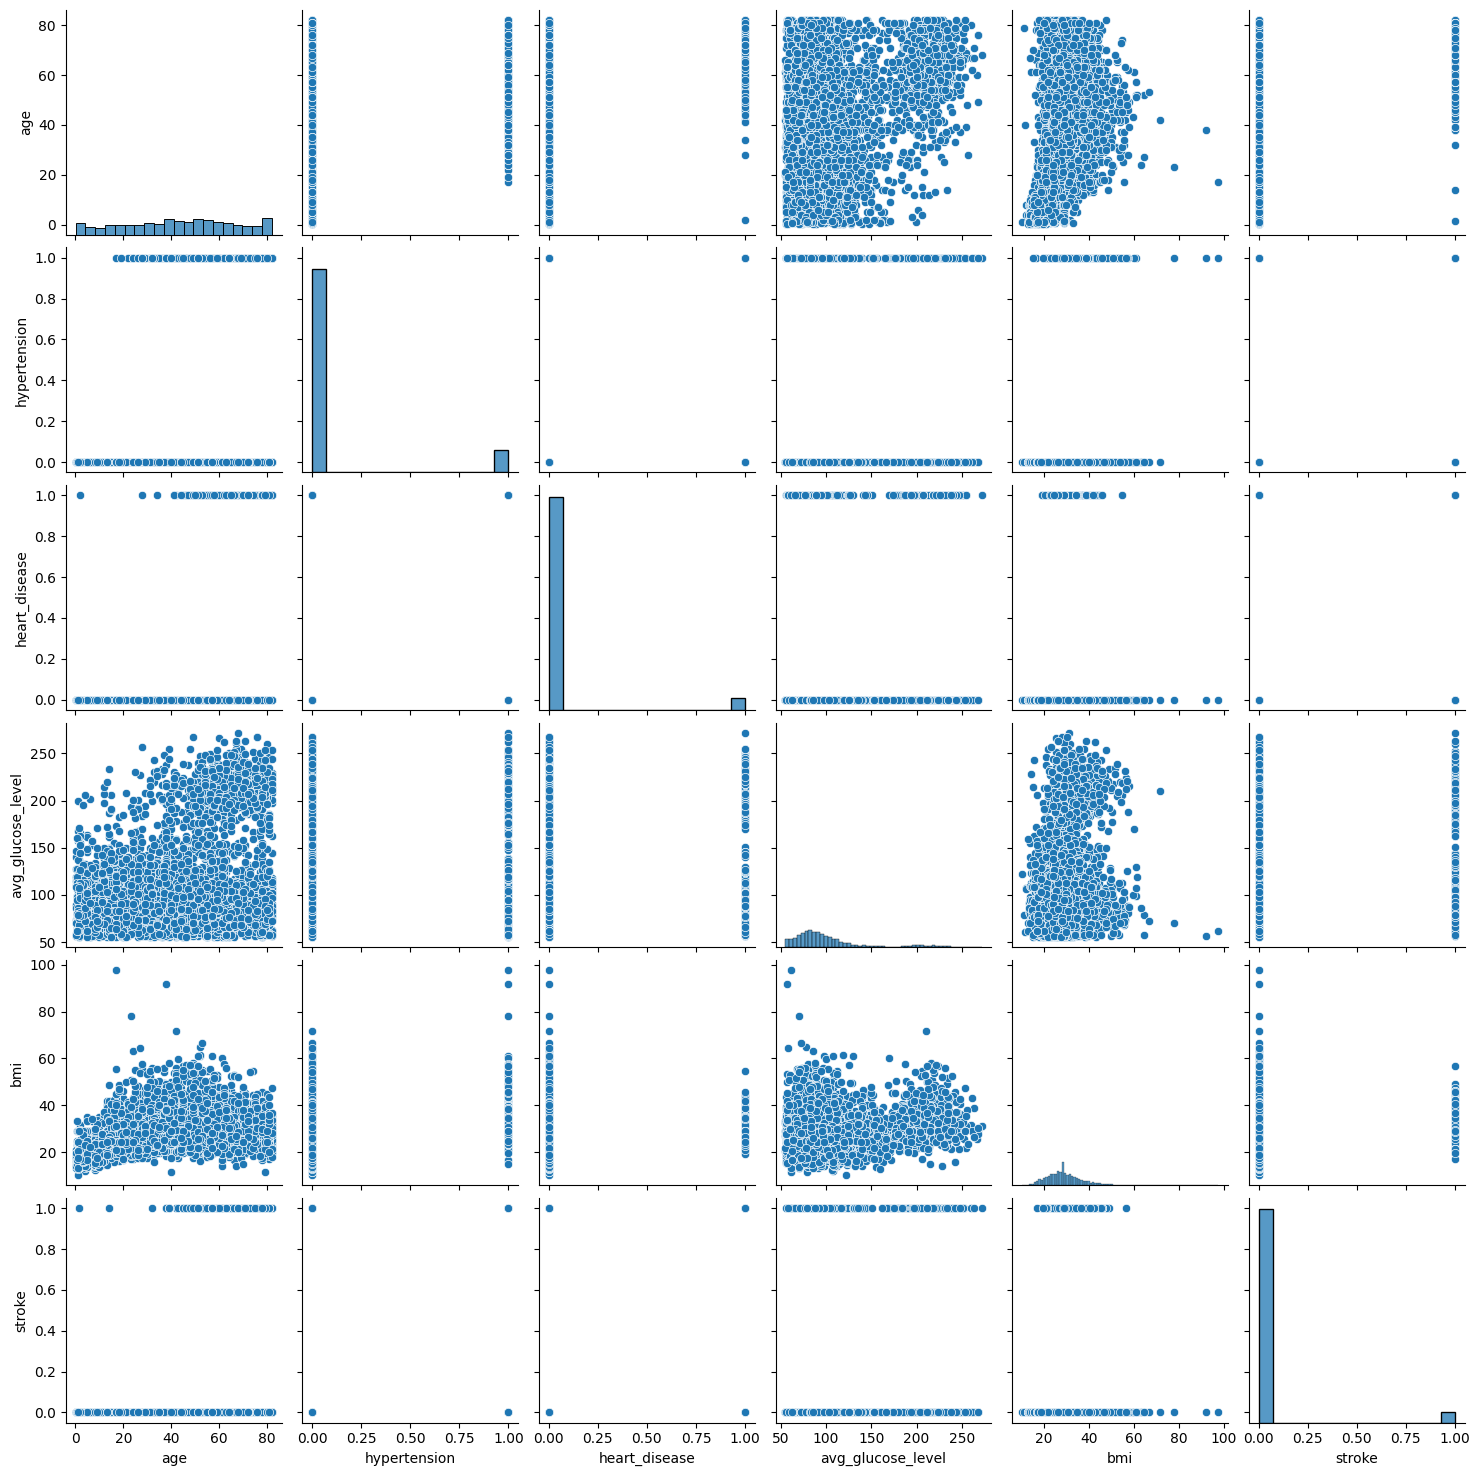

In [87]:
sns.pairplot(df)

###### This pair plot visualizes relationships between variables like age, hypertension, heart disease, glucose levels, BMI, and stroke. 
---

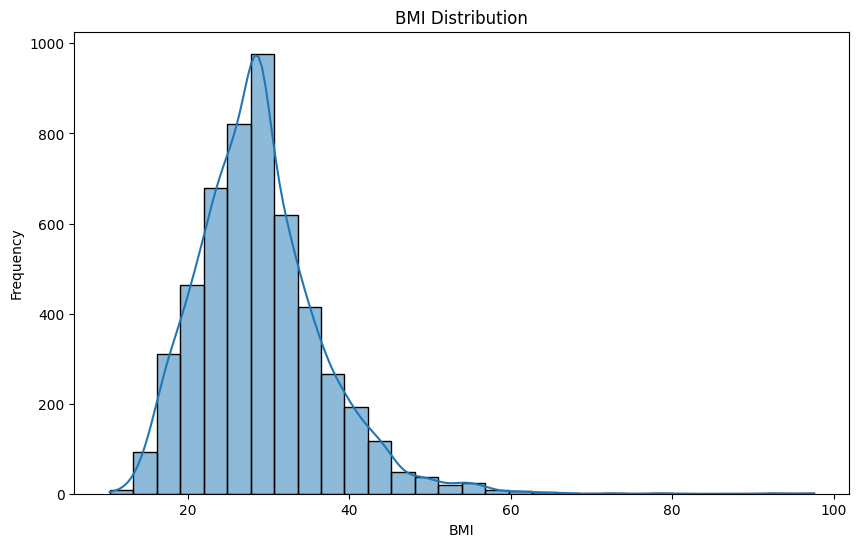

In [88]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

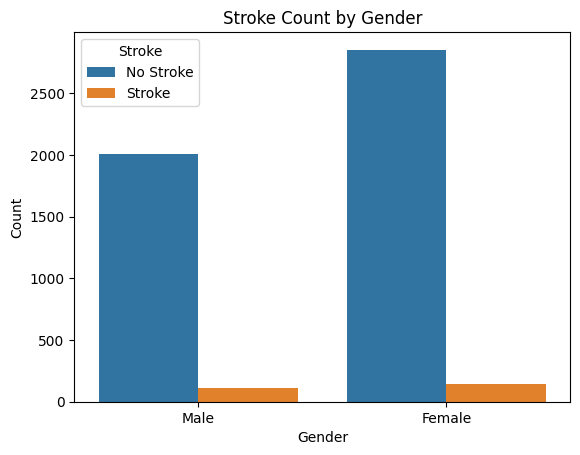

In [89]:
# Stroke count by gender
sns.countplot(data=df, x='gender', hue='stroke')
plt.title('Stroke Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

###### This bar chart shows the distribution of stroke cases by gender. Both males and females have a significantly higher count of "No Stroke" cases (blue bars) compared to stroke cases (orange bars). While females have a slightly higher overall count in both categories, the proportion of stroke cases to total cases appears similar for both genders, indicating no strong gender-based difference in stroke occurrences.
---

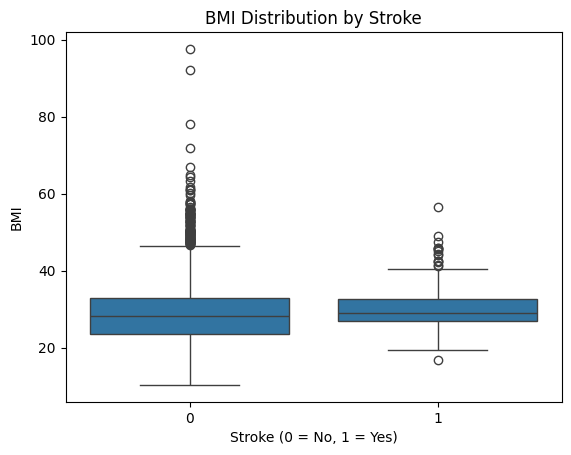

In [90]:
# BMI Distribution by Stroke
sns.boxplot(data=df, x='stroke', y='bmi')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


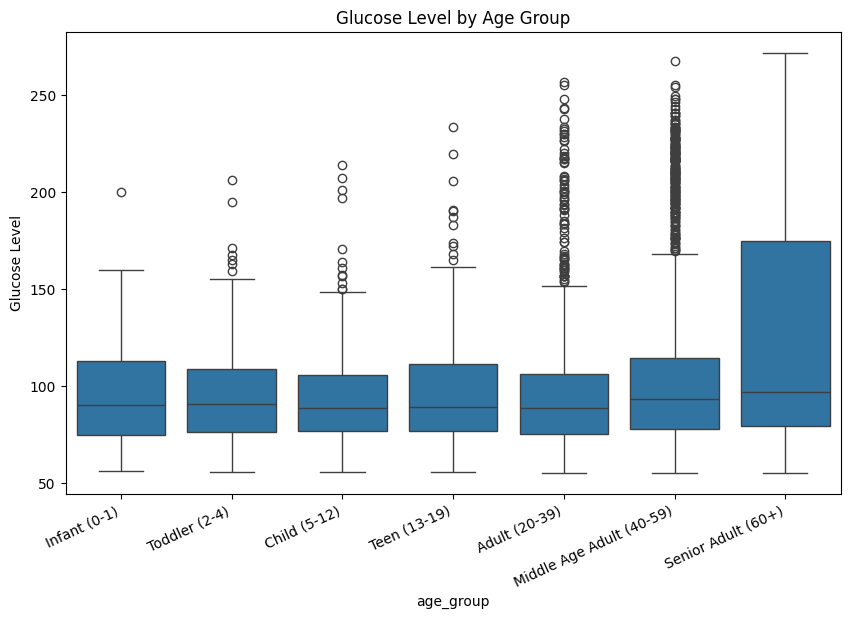

In [91]:
# Age vs Glucose level

age_bins = [0, 1, 4, 12, 19, 39, 59, 120]
age_labels = ["Infant (0-1)", "Toddler (2-4)", "Child (5-12)", "Teen (13-19)", "Adult (20-39)", "Middle Age Adult (40-59)", "Senior Adult (60+)"]
# Bin ages into groups based on the new ranges
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=True)

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="age_group", y="avg_glucose_level")
plt.xticks(rotation=25, ha="right")
plt.title("Glucose Level by Age Group")
plt.ylabel("Glucose Level")
plt.show()

# A good average glucose level in the human body is considered to be between 70mg/dL and 100mg/dL when fasting (before a meal)

###### This box plot shows glucose levels across age groups, with most levels similar except for senior adults (60+), who have higher and more variable levels. Outliers indicate unusually high or low levels, and glucose tends to increase with age.
---

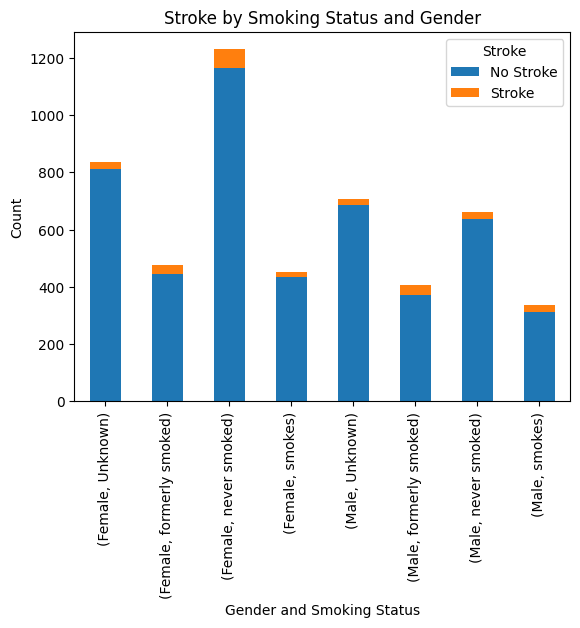

In [92]:
# Stroke by Smoking Status and Gender
stroke_grouped = df.groupby(['gender', 'smoking_status', 'stroke']).size().reset_index(name='count')
stroke_pivot = stroke_grouped.pivot_table(index=['gender', 'smoking_status'], columns='stroke', values='count', fill_value=0)

stroke_pivot.plot(kind='bar', stacked=True)
plt.title('Stroke by Smoking Status and Gender')
plt.xlabel('Gender and Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


###### This bar chart shows the relationship between smoking status, gender, and stroke occurrences. Most individuals fall into the "No Stroke" category across all groups, with females who have "never smoked" being the largest group.
---

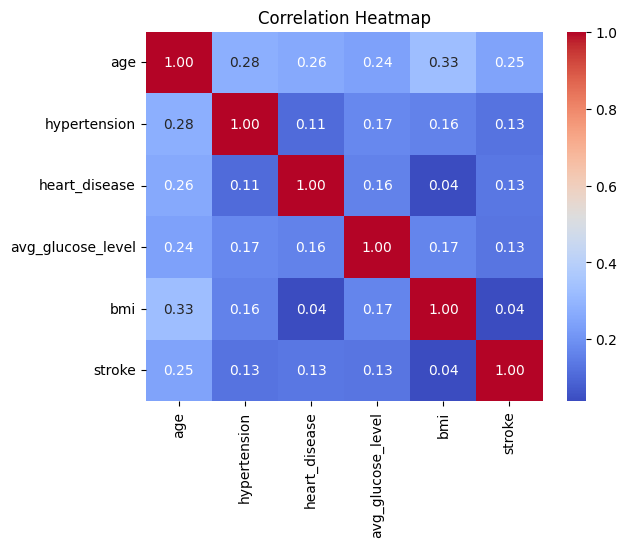

In [93]:
# Correlation Matrix
correlation_data = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Logistic Regression

In [94]:
# Label encoding

le = preprocessing.LabelEncoder() 
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [95]:
# Separate columns
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']] 
y = df[[ 'stroke']] 


In [96]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [97]:
# SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [98]:
# Train Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [99]:
# Add Constant
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [100]:
# Logistic Regression
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.407856
         Iterations 7


In [101]:
# Summary Stats
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 7777
Model:                          Logit   Df Residuals:                     7766
Method:                           MLE   Df Model:                           10
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4116
Time:                        08:10:47   Log-Likelihood:                -3171.9
converged:                       True   LL-Null:                       -5390.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.2001      0.229    -18.339      0.000      -4.649      -3.751
gender               -0.7649      0.068    -11.265      0.000      -0.898      -0.632
age                   0.0953      0.002     40.371      0.000       0.091       0.100
hypertension         -1.0891      0.106    -10.314      0.000      -1.296      -0.882
heart_disease        -1.0001      0.134     -7.489      0.000      -1.262      -0.738
ever_married         -0.9243      0.088    -10.494      0.000      -1.097      -0.752
work_type            -0.3440      0.037     -9.280      0.000      -0.417      -0.271
Residence_type       -0.9894      0.065    -15.257      0.000      -1.117      -0.862
avg_glucose_level     0.0068      0.001     11.094      0.000       0.006       0.008
bmi                   0.0162      0.005      2.998      0.003       0.006       0.027
smoking_status       -0.3212      0.034     -9.411      0.000      -0.388      -0.254
=====================================================================================
"""

###### The logistic regression results highlight age, hypertension, heart disease, and average glucose level as the most influential predictors of stroke risk, with significant contributions from BMI, marital status, and smoking status.
---

In [102]:
y_pred = result.predict(X_test_sm)
y_pred_class = (y_pred > 0.5).astype(int)

In [103]:
# Confidence intervals for the model parameters
conf_intervals = result.conf_int()
conf_intervals

,0,1
const,-4.648988,-3.751225
gender,-0.898032,-0.631846
age,0.090680,0.099934
hypertension,-1.296006,-0.882096
heart_disease,-1.261882,-0.738408
ever_married,-1.096981,-0.751704
work_type,-0.416668,-0.271356
Residence_type,-1.116525,-0.862315
avg_glucose_level,0.005605,0.008010
bmi,0.005601,0.026761


## Performance Metrics

In [104]:
confusion_matrix(y_test, y_pred_class)

array([[761, 214],
       [161, 809]], dtype=int64)

In [105]:
# Full Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_class))


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       975
           1       0.79      0.83      0.81       970

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



In [106]:
precision = precision_score(y_test, y_pred_class, average='binary')
print("Precision:", precision)

f1=f1_score(y_test, y_pred_class, average='binary')
print("F1 Score:", f1)

Precision: 0.7908113391984359
F1 Score: 0.811841445057702


###### The model achieved an accuracy of 81% with balanced performance across both classes. The precision (79%), recall (83%), and F1-score (81%) indicate that the model performs well in identifying both strokes and non-strokes, with slightly better recall for the positive class which is stroke cases.
---

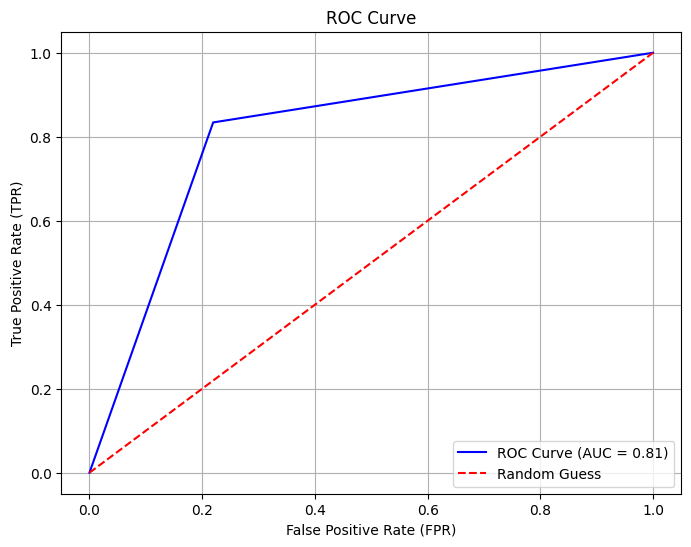

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_class)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

###### The curve is above the diagonal (random guess), meaning the model effectively balances true positive and false positive rates.